In [39]:
%pylab inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

import numpy as np
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


1. Write one brief paragraph describing the dataset you chose.
2. Applying 10-fold cross validation and at least 3 metrics of your choice, evaluate how multiple classification methods perform on that task. You must use at least 1 simple classifier (for comparison), and all ensemble methods discussed in this module. Bagging, Ada Boost, Random Forests and Extra Trees are natively implemented in scikit learn. For stacking, you can use the implementation available through the Machine Learning Extensions package 

DataSet Explanation:
Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.

total number of instances:1372

Attribute Information:

1. variance of Wavelet Transformed image (continuous) 
2. skewness of Wavelet Transformed image (continuous) 
3. curtosis of Wavelet Transformed image (continuous) 
4. entropy of image (continuous) 
5. class (integer) 




In [5]:
fileURL = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"
data = pd.read_csv(fileURL,names=['variance_of_Wavelet','skewness_of_Wavelet','curtosis_of_Wavelet','entropy_of_image','class'])

In [6]:
data[:3]

,variance_of_Wavelet,skewness_of_Wavelet,curtosis_of_Wavelet,entropy_of_image,class
0,3.6216,8.6661,-2.8073,-0.44699,0
1,4.5459,8.1674,-2.4586,-1.46210,0
2,3.8660,-2.6383,1.9242,0.10645,0


In [24]:
X= data.ix[:, 0:4]
y= data.ix[:,-1]

In [25]:
X[:3]

,variance_of_Wavelet,skewness_of_Wavelet,curtosis_of_Wavelet,entropy_of_image
0,3.6216,8.6661,-2.8073,-0.44699
1,4.5459,8.1674,-2.4586,-1.46210
2,3.8660,-2.6383,1.9242,0.10645


In [26]:
y[:3]

0    0
1    0
2    0
Name: class, dtype: int64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4, random_state=42)

In [44]:
clf1 = KNeighborsClassifier(n_neighbors=3)
clf2 = RandomForestClassifier(random_state=1)
clf3 = GaussianNB()
lr = LogisticRegression()
sclf = StackingClassifier(classifiers=[clf1, clf2, clf3],meta_classifier=lr)
bag = BaggingClassifier()
ab = AdaBoostClassifier()
et = ExtraTreesClassifier()


print('10-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3,lr, sclf,bag,ab,et], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'Logistic Regression',
                       'StackingClassifier',
                      'Bagging',
                      'AdaBoostingClassifier',
                      'ExtraTreesClassifier']):
    clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_test, y_test, cv=10, scoring='accuracy')
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

10-fold cross validation:

Accuracy: 1.00 (+/- 0.00) [KNN]
Accuracy: 0.99 (+/- 0.02) [Random Forest]
Accuracy: 0.84 (+/- 0.05) [Naive Bayes]
Accuracy: 0.99 (+/- 0.01) [Logistic Regression]
Accuracy: 0.99 (+/- 0.01) [StackingClassifier]
Accuracy: 0.99 (+/- 0.01) [Bagging]
Accuracy: 0.99 (+/- 0.01) [AdaBoostingClassifier]
Accuracy: 1.00 (+/- 0.01) [ExtraTreesClassifier]


ValueError: X must be a 2D array

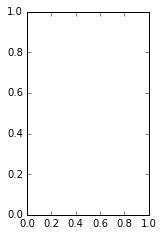

In [50]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools

gs = gridspec.GridSpec(2, 4)

fig = plt.figure(figsize=(10,8))

for clf, lab, grd in zip([clf1, clf2, clf3,lr, sclf,bag,ab,et], 
                      ['KNN', 
                       'Random Forest', 
                       'Naive Bayes',
                       'Logistic Regression',
                       'StackingClassifier',
                      'Bagging',
                      'AdaBoostingClassifier',
                      'ExtraTreesClassifier'],
                        itertools.product([0, 1], repeat=2)):

    clf.fit(X_train, y_train)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=(X_test), y=(y_test), clf=clf)
    plt.title(lab)